<a href="https://colab.research.google.com/github/SaionaraAraujo/Desafio-Spotify/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

In [12]:
import pandas as pd

df = pd.read_csv('/content/top50.csv', sep=";",encoding='ISO-8859-1')
#Análise exploratória inicial sobre as colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


A partir da saída acima, podemos ver que temos 50 linhas nessa lista, 11 colunas numéricas e 3 colunas com Strings. A seguir, vamos ver as medidas estatíticas sobre as variáveis numéricas:

# Análise estatísticas das variáveis numéricas

In [13]:
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


# Valores Nulos

In [5]:
#veriicando se há valores ausentes no dataset:
df.isnull().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

Com a análise acima, vemos que não há valores nulos para serem tratados. O próximo passo, é analisar é agrupar o estilos musicais, para vermos qual é o mais presente:

# Agrupamentos de estilo musical e artista

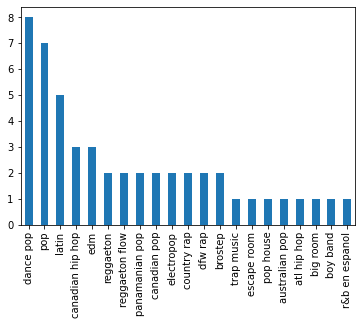

In [9]:
df['Genre'].value_counts().plot(kind='bar')

Com esse simples gráfico de barras, podemos concluir que o genêro mais consumido no perído foi o Dance Pop. Analisemos então os artistas mais tocados:

In [11]:
df['Artist.Name'].value_counts()
#.plot(kind='bar')

Ed Sheeran          4
Shawn Mendes        2
Lil Nas X           2
J Balvin            2
Sech                2
Billie Eilish       2
The Chainsmokers    2
Marshmello          2
Post Malone         2
Ariana Grande       2
ROSALÍA             1
Khalid              1
Lady Gaga           1
Daddy Yankee        1
Kygo                1
Lauv                1
Jonas Brothers      1
Martin Garrix       1
Katy Perry          1
Young Thug          1
Maluma              1
Taylor Swift        1
Jhay Cortez         1
Ali Gatie           1
Tones and I         1
Lunay               1
Anuel AA            1
MEDUZA              1
Lizzo               1
Y2K                 1
Chris Brown         1
Drake               1
Lewis Capaldi       1
DJ Snake            1
Bad Bunny           1
Sam Smith           1
Lil Tecca           1
Nicky Jam           1
Name: Artist.Name, dtype: int64

No caso dos artistas, não foi utilizado o gráfico de barras por existirem muitas possibilidades e isso pode prejudicar a legibilidade do gráfico. Como o foco desta análise é explorar os dados, fica como sugestão de melhoria para este trabalho, definir um gráfico que mostre estas informações de forma a transmitir com clareza o que os dados nos mostram. Quanto ao artista mais tocado, podemos ver que o com mais registros é **Ed Sheeran**.

# Matriz de Correlação

In [14]:
df.corr()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Unnamed: 0,1.000000,-0.259193,0.102649,0.122691,0.011914,0.270659,0.137329,-0.065844,-0.015993,-0.257506,-0.160680
Beats.Per.Minute,-0.259193,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.102649,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,0.122691,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.011914,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,0.270659,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,0.137329,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.065844,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.015993,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,-0.257506,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553


A matriz de correlação nos mostra o quanto uma variável depende de outra. De maneira bem simples, quanto mais próximo de 1 o valor entre duas variáveis, as duas crescem no mesmo sentido. Já, quanto mais próximo de -1, enquanto uma variável cresce em um sentido, a outra tende ao sentido oposto. Caso o valor seja 0, significa que as variáveis não tem relação. 

Dessa forma, podemos ver por exemplo que as variáveis `Liveness`e `Popularity`tem alta correlação positiva, ou seja, quanto maior a Livenesse (ou vivacidade) da música, maior a popularidade. Ao mesmo tempo que,`Beats.Per.Minute`e `Danceability`, são inversamente dependentes, onde quanto maior o valor da Beats.Per.Minut, menor o valor da Danceability.